# Lasso Regression (L1 Regularization)

`Lasso Regression (Least Absolute Shrinkage and Selection Operator)` is a **regularized version of Linear Regression**
that reduces overfitting by adding an **L1 penalty** to the loss function.

A key property of Lasso is that it can force some coefficients to become **exactly zero**, making it useful
for **feature selection**.

---

## Why Lasso Regression is Needed

Ordinary Least Squares (OLS) regression minimizes:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

This can result in:
- Overfitting  
- Large and unstable coefficients  
- Poor generalization on unseen data  

Lasso addresses these issues by penalizing the **absolute magnitude** of coefficients.

---

## Lasso Cost Function (L1 Regularization)

The Lasso objective function is:

$$
J(\theta) =
\frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
+ \lambda \sum_{j=1}^{p} |\theta_j|
$$

Where:
- $(\lambda)$ = regularization strength  
- $(\theta_j)$ = model coefficients (bias term excluded)  
- $(p)$ = number of features  

The L1 penalty encourages sparsity in the model.

---

## Effect of the Regularization Parameter $(\lambda)$

| Value of $(\lambda)$ | Effect |
|---------------------|--------|
| $(\lambda = 0)$ | Same as Linear Regression |
| Small $(\lambda)$ | Weak regularization |
| Large $(\lambda)$ | Many coefficients become zero |

Increasing $(\lambda)$ simplifies the model.

---

## Optimization Behavior

Unlike Ridge Regression, Lasso’s loss function is **not differentiable at zero**.
This property allows Lasso to set coefficients exactly to zero.

In practice, specialized optimization methods are used.

---

## Key Characteristics

- Uses **L1 norm**: \( \sum |\theta_j| \)  
- Performs automatic feature selection  
- Produces sparse models  
- Reduces model complexity  

---

## Importance of Feature Scaling

Feature scaling is critical for Lasso because:
- Coefficients are directly penalized by magnitude  
- Features with larger scales can dominate regularization  

Standardization is strongly recommended.

---

## Lasso vs Ridge Regression

| Aspect | Ridge | Lasso |
|------|-------|-------|
| Regularization type | L2 | L1 |
| Coefficients become zero | No | Yes |
| Feature selection | No | Yes |
| Multicollinearity handling | Good | Poor (selects one feature) |

---

## When to Use Lasso Regression

Lasso Regression is preferred when:
- Many features may be irrelevant  
- Feature selection is important  
- Model interpretability is a priority  
- You want a simpler model  

---

## Summary

Lasso Regression adds an L1 penalty to the loss function, shrinking coefficients and setting some
to zero. This makes it a powerful tool for feature selection and overfitting control in linear
and polynomial regression models.


In [1]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[27.53487423]
0.02296710623741527


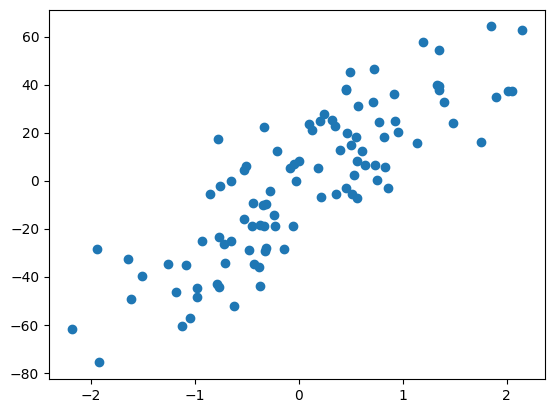

In [3]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

C:\Users\Msi Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Msi Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Msi Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+04, tolerance: 7.024e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solve

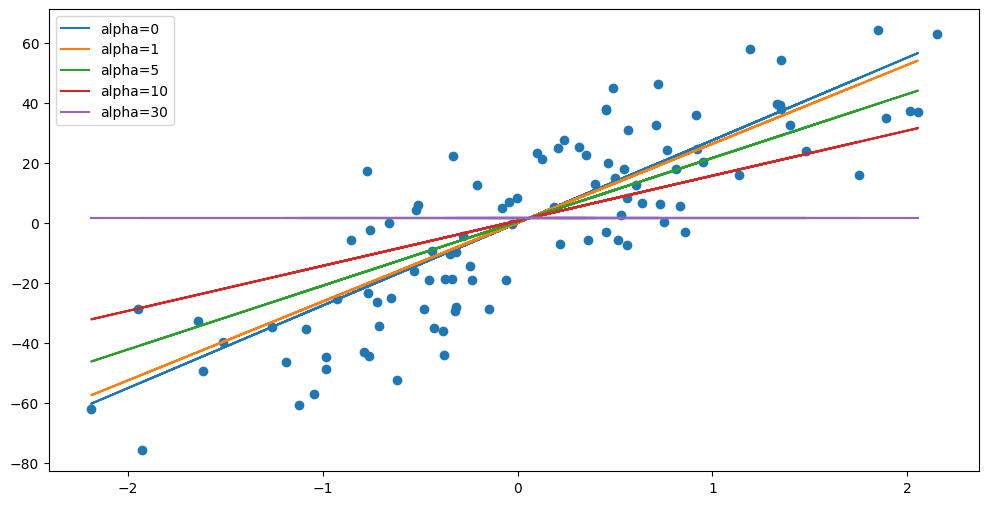

In [4]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

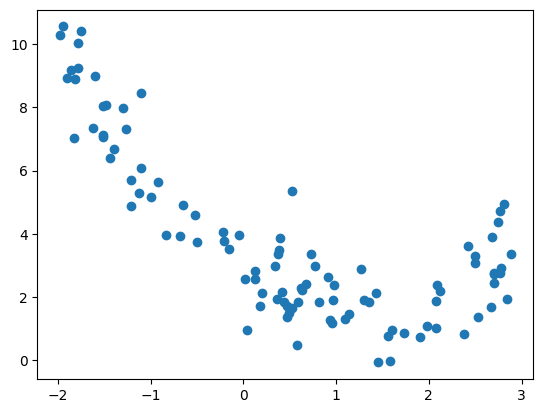

In [5]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

C:\Users\Msi Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Msi Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Msi Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.283e+01, tolerance: 7.166e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solve

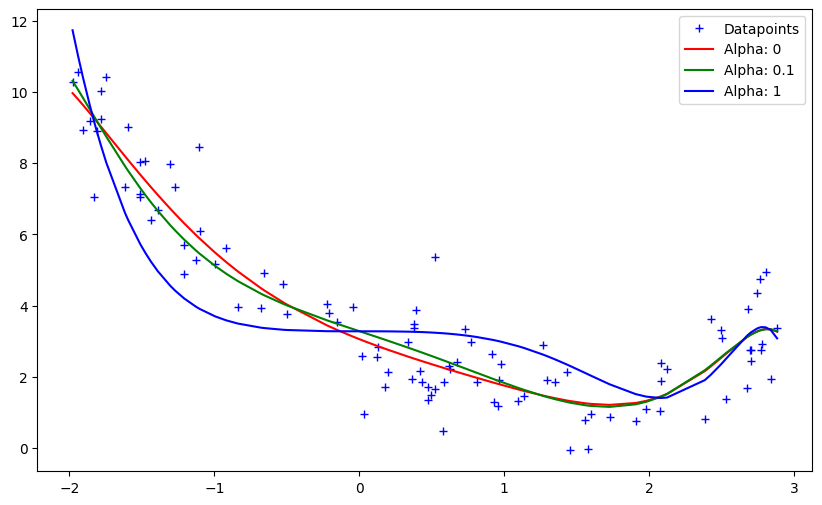

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()